# Integrator

This demo implements a one-dimensional neural integrator.

This example utilizes a recurrent network.
It shows how neurons can be used to implement stable dynamics.
Such dynamics are important for memory, noise cleanup,
statistical inference, and many other dynamic transformations.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

import nengo
from nengo.processes import Piecewise
import nengo_loihi

nengo_loihi.set_defaults()

## Creating the network in Nengo

Our model consists of one recurrently connected ensemble,
and an input node.
The input node will provide a piecewise step function as input
so that we can see the effects of recurrence.

In [2]:
with nengo.Network(label="Integrator") as model:
    ens = nengo.Ensemble(n_neurons=120, dimensions=1)
    stim = nengo.Node(Piecewise({0: 0, 0.2: 1, 1: 0, 2: -2, 3: 0, 4: 1, 5: 0}))

    # Connect the population to itself
    tau = 0.1
    nengo.Connection(ens, ens, transform=[[1]], synapse=tau)
    nengo.Connection(stim, ens, transform=[[tau]], synapse=tau)

    # Collect data for plotting
    stim_probe = nengo.Probe(stim)
    ens_probe = nengo.Probe(ens, synapse=0.01)

## Running the network in Nengo

We can use Nengo to see the desired model output.

In [3]:
with nengo.Simulator(model) as sim:
    sim.run(6)
t = sim.trange()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

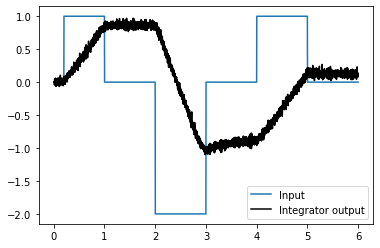

In [4]:
def plot_decoded(t, data):
    plt.figure()
    plt.plot(t, data[stim_probe], label="Input")
    plt.plot(t, data[ens_probe], "k", label="Integrator output")
    plt.legend()


plot_decoded(t, sim.data)

## Running the network with NengoLoihi

In [5]:
with nengo_loihi.Simulator(model) as sim:
    sim.run(6)
t = sim.trange()

/home/travis/build/nengo/nengo-loihi/nengo_loihi/builder/discretize.py:477: UserWarning: Lost 2 extra bits in weight rounding
  warnings.warn("Lost %d extra bits in weight rounding" % (-s2,))


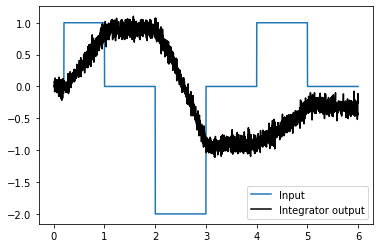

In [6]:
plot_decoded(t, sim.data)

The network integrates its input,
but without input decays quicker than the Nengo model.
Likely the same workarounds
discussed in the communication channel example
will be useful here.